<a href="https://colab.research.google.com/github/kaffy90/data_science_sample_project/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparative Approach: SVM and CNN for Breast Cancer Detection

Breast cancer occurs due to excessive cell growth in the breast and it is the second most deadly disease especially in women. Urbanization and an increase in life expectancy have caused a rapid the incidence of breast cancer. Doctors through their eye carry out various screening through X-ray, MIR scan and ultrasound images to confirm the diagnosis. Therefore, there is a need for a more efficient mechanism to automate early detection using machine learning algorithms to increase the survival rate of a patient. 


Breast Cancer Detection using Support Vector Machine (SVM) machine learning algorithm and Covolutional Neural Network (CNN) 
Classification of Breast Cancer Images (Malignant (cancerous) , Beligent (non-cancerous tumor) and Normal) and comparing the performance of the algorithms.


Breast cancer images data source : ‘mini-MIAS database of mammograms’ http://peipa.essex.ac.uk/info/mias.html 

Steps for the experiment;

1.   Images Dataset processing
2.   Build the CNN and SVM model 
3.   Train the models
4.   Test the models
5.   Evaluate and compare the models





## Getting Workspace Ready

Importing the following machine and deep neural learning Python based libraries necessary to carry out this experiment

* Pandas
* Sklearn
* Numpy 
* Tensorflow
* Keras
* Matplotlib













***Mount Drive***

*DONE ONCE TO LOAD DATASET FROM GOOGLE DRIVE TO GOOGLE COLAB*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Breastcancer-20210523T111951Z-001.zip"  

***COVOLUTIONAL NEURAL NETWORK EXPERIMENT***

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import os




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
list_dataset_dir = os.listdir("/content/drive/MyDrive/Breastcancer/Breast_Cancer_Images")
list_dataset_dir

['CIRC-M',
 'MISC-B',
 'NORM',
 'ASYM-B',
 'CIRC-B',
 'CALC-M',
 'SPIC-M',
 'SPIC-B',
 'ARCH-M',
 'CALC-B',
 'ARCH-B',
 'MISC-M',
 'ASYM-M']

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Breastcancer/Breast_Cancer_Images') 
count = len(list(data_dir.glob('*/*.png')))
count

711

## Images Dataset processing

***CNN approach: Splitting the images data with Keras preprocessing function*** 

Tensors: are a numerical representation of the image data which is in array dimension data structure. 

‘tf.keras.preprocessing.image_dataset_from_directory
’ this function splits the 13 classes into training and validation datasets, 80% (training dataset) and 20% (validation dataset) and converts the images to tensors. With function has the following parameters;


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

## Training Dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 711 files belonging to 13 classes.
Using 569 files for training.


## Validation Dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 711 files belonging to 13 classes.
Using 142 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

count = len(class_names)

print(count)

['ARCH-B', 'ARCH-M', 'ASYM-B', 'ASYM-M', 'CALC-B', 'CALC-M', 'CIRC-B', 'CIRC-M', 'MISC-B', 'MISC-M', 'NORM', 'SPIC-B', 'SPIC-M']
13


## Visualize the dataset

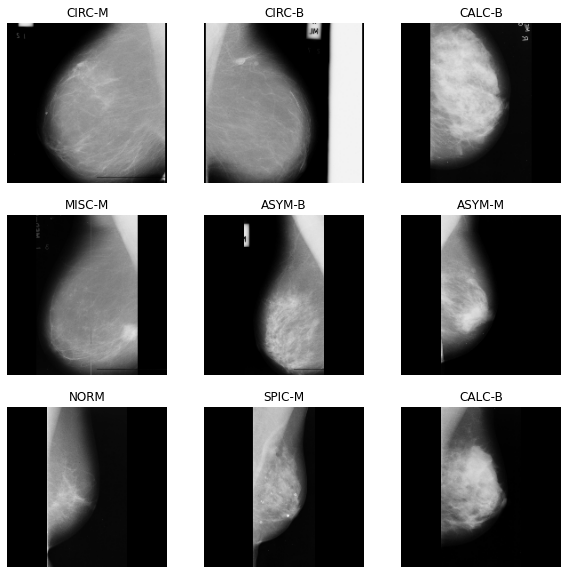

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


***Configure the image datasets***: Methods needed to configure the image datasets to improve the performance and create an efficient input pipeline for the CNN model

***Normalisation***: 
Is the resize or rescaling of the dataset images to standardize the pixel values to be in the [0, 1] range. This method will also fix images of different sizes to have the same size. Using the ‘layers.experimental.preprocessing’ Keras function to rescale the image pixel value for faster converging the training convolutional neural network model and are rescaled to img_height = 180 img_width = 180


***Image Argumentation***: 
When training it is best to train with lots of image data to avoid overfitting which occurs when there are small samples for the model to learn from. Therefore, to ensure a practical accuracy of the model prediction, the image argumentation is implemented using TensorFlow ‘tf’ with the Keras layers module ‘tf.keras.layers.experimental.preprocessing’ which is then applied to the training model to help increase the scope of the limited dataset with different manipulation techniques such as flip, rotation, zoom, a contrast to generate new image data samples and extend the quantity of the dataset used in training the model and improve the overall performance. 



In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
image_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                     input_shape=(img_height,img_width,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1), 
        layers.experimental.preprocessing.RandomContrast(0.1)   
    ]
)

***Argumentation on an image***

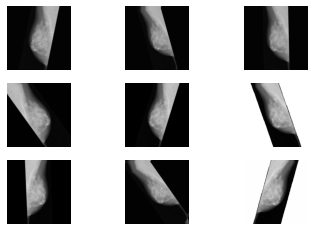

In [ ]:
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = image_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

***Normalisation of dataset***




In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))

## Create the model

Below is the proposed convolutional Neural Network used for this experiment with 128 units that are activated by a ReLU activation function and Keras sequential module. In this model, the CNN performs two functions; i) extracts the breast cancer images features and ii) classifies according to the labelled classes of the images in the final layer (Dense layer). Image augmentation and normalisation generated in chapter 4 are also applied to the model.

conv2d(): creates a 2-dimensional convolutional layer with arguments of the number of filters, filter kernel size, padding, and activation function.
max_pooling2d(): constructs a 2-dimensional pooling layer with the max-pooling algorithm.
flatten(): will take the output from the max-pooling layer and convert it to a 1D array to input into the dense layers. 
dense(): generates a dense layer which includes the  hyperparameters of the hidden layers and weight units


In [ ]:
num_classes = 13

model = Sequential([
  image_augmentation,                  
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

***Compile the model***

The ‘Adam optimizer’ adjusts the weights in the network to reduce loss and the ‘losses.SparseCategoricalCrossentropy’ loss function calculates the loss and both are used to view the training and validation accuracy at each training epoch.






In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

***Model summary***

View all the layers of the network using the model's summary method:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

## Train the model

The backpropagation algorithm is mainly used for training neural networks. The model performance depends on the weights w the loss function calculated and gradient descent optimization. The epochs parameter is the number of iterations conducted for training the model with the images dataset. The model was trained from 10 to 50 epochs and at the end, the model performs well at 50 epochs.



In [ ]:
epochs=70
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/70
18/18 [==============================] - 1s 28ms/step - loss: 0.6932 - accuracy: 0.7627 - val_loss: 0.7792 - val_accuracy: 0.6901
Epoch 2/70
18/18 [==============================] - 0s 24ms/step - loss: 0.6947 - accuracy: 0.7768 - val_loss: 0.8472 - val_accuracy: 0.6549
Epoch 3/70
18/18 [==============================] - 0s 23ms/step - loss: 0.6901 - accuracy: 0.7768 - val_loss: 0.7195 - val_accuracy: 0.7394
Epoch 4/70
18/18 [==============================] - 0s 23ms/step - loss: 0.6471 - accuracy: 0.7786 - val_loss: 0.8328 - val_accuracy: 0.6831
Epoch 5/70
18/18 [==============================] - 0s 24ms/step - loss: 0.6280 - accuracy: 0.7856 - val_loss: 0.8067 - val_accuracy: 0.7254
Epoch 6/70
18/18 [==============================] - 0s 23ms/step - loss: 0.6065 - accuracy: 0.7961 - val_loss: 0.6915 - val_accuracy: 0.7324
Epoch 7/70
18/18 [==============================] - 0s 23ms/step - loss: 0.5732 - accuracy: 0.8049 - val_loss: 0.6107 - val_accuracy: 0.7465
Epoch 8/70
18

***Visualize training results***

Create plots of loss and accuracy on the training and validation sets.

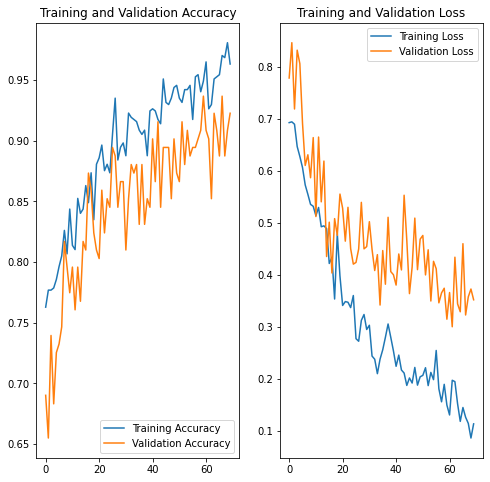

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Predict/Test model***

To detect Breast Cancer on New Image

In [ ]:
test_ds = pathlib.Path('/content/drive/MyDrive/Breastcancer/Breast_Cancer_Test/mdb134_result.png')

img_predict = keras.preprocessing.image.load_img(
    test_ds, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img_predict)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image belongs to {} with a {:.2f} percent accurate."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image belongs to MISC-M with a 92.57 percent accurate.


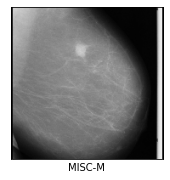

In [ ]:
def plot_image(predictions, class_names, img_predict):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img_predict, cmap=plt.cm.binary)

  predictions = model.predict(img_array)
  
  predicted_label = np.argmax(predictions)
  
  plt.xlabel("{}".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[np.argmax(score)]))
  
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions,class_names,img_predict)

In [ ]:
test_ds_2 = pathlib.Path('/content/drive/MyDrive/Breastcancer/Breast_Cancer_Test/mdb023.png')

img_predict_2 = keras.preprocessing.image.load_img(
    test_ds_2, target_size=(img_height, img_width)
)
img_array_2 = keras.preprocessing.image.img_to_array(img_predict_2)
img_array_2 = tf.expand_dims(img_array_2, 0) # Create a batch

predictions_2 = model.predict(img_array_2)
score_2 = tf.nn.softmax(predictions_2[0])

print(
    "This image belongs to {} with a {:.2f} percent accurate."
    .format(class_names[np.argmax(score_2)], 100 * np.max(score_2))
)

This image belongs to CALC-M with a 62.58 percent accurate.


***SVM CLASSSIFIER EXPERIMENT***

***Load images dataset***

In [ ]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images")
dirs = p.glob("*")
labels_dict = {}

image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("\\")
    
    for img_path in folder_dir.glob("*.png"):
        img = image.load_img(img_path, target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label)


print(len(image_data))
print(len(labels))

734
734


In [ ]:
# Convert data into numpy array


image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)


(734, 32, 32, 3) (734, 1)


***Image processing add noisy features***

In [ ]:
# Randomly shuffle data
# Adding noisy features 

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

***view dataset***

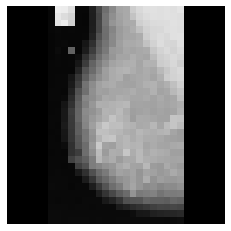

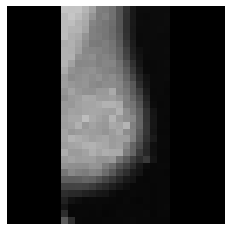

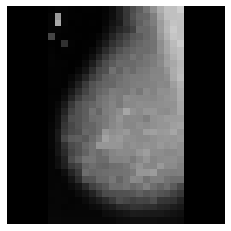

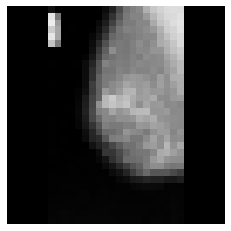

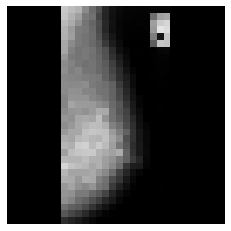

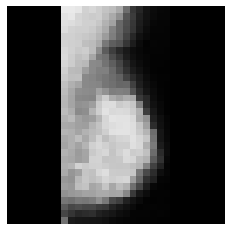

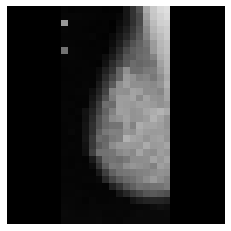

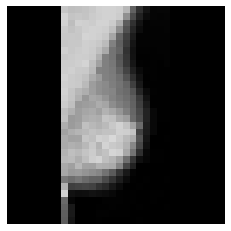

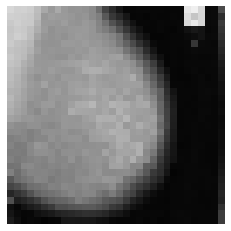

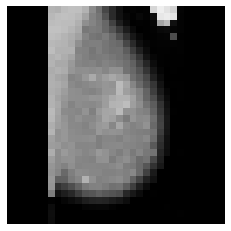

In [ ]:
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return
for i in range(10):
    drawImg(image_data[i])

***Splitting the dataset***

In [ ]:
n_samples = len(image_data)
data_image_n = image_data.reshape((n_samples, -1))



In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(data_image_n, labels, test_size=0.2, random_state=44000)

In [ ]:
number_of_classes = len(np.unique(labels))

print(number_of_classes)

12


***Create the SVM model***

using sklearn api and test the model on the test dataset

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.005)

# Learn the digits on the train subset
clf.fit(X_train, y_train.ravel())

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(f"{precision_score(y_test, predicted, average='weighted', labels=np.unique(predicted)) *100} percent")

#print(accuracy_score(y_test, predicted)) 

print(f'{accuracy_score(y_test, predicted)*100} percent')

72.22760921697424 percent
64.62585034013605 percent


***show predicted images from the test dataset***

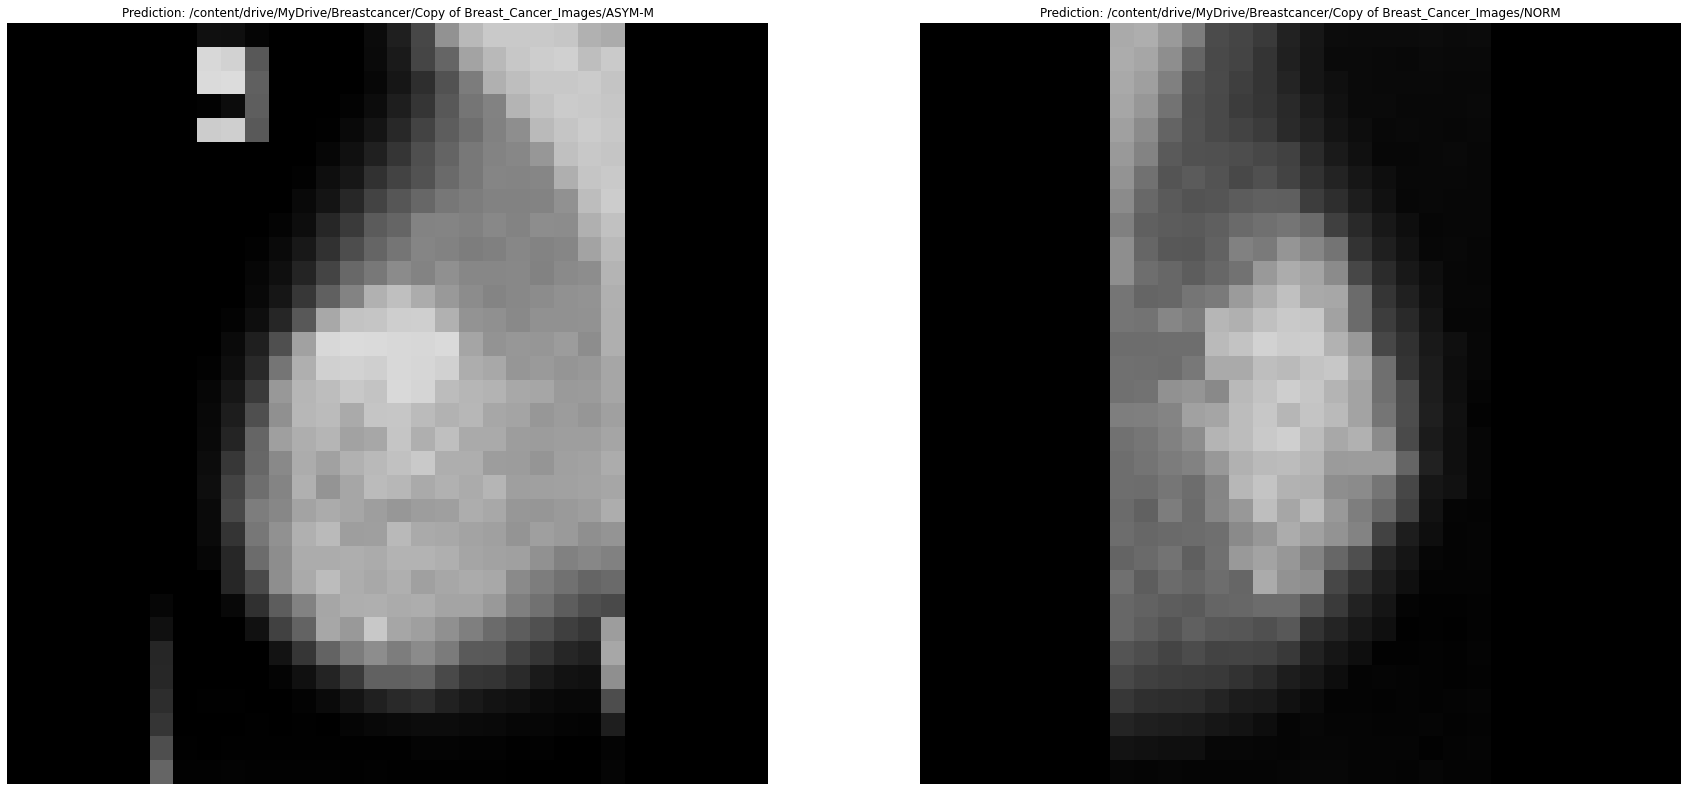

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 30))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(32,32,3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    

***Evaluate the model using confusion matrix***


The confusion matrix is also a classification metric to evaluate the SVM classifier accuracy. The generated confusion matrix map shows the prediction percentage for each class of breast cancer images and shows the number of classed images and the misclassified images.

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,display_labels=labels)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
print(confusion_matrix(y_test,predicted))

[[ 5  0  0  0  0  5  0  0  0  1  0  0]
 [ 0  5  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0 14  2  0  0  0  3  0  0]
 [ 0  1  0  0  0 13  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  2  0  0  1  3  0  0  0 36  0  0]
 [ 0  0  0  0  0  4  0  0  0  3  4  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  9]]


***Generating the classification report metrics*** 

Precision known as the positive predictive value is the ratio of tp / (tp + fp) where precision is the capability of the classifier, not to label a positive sample as negative.
tp = number of true positives
fp = number of false positives 

Recall (sensitivity) is the ratio tp / (tp + fn) where recall is the capability of the classifier to locate all the positive samples.
fn =  number of false negatives. 

F-score is the weighted mean of the precision and recall, which is a measure of the predicted test accuracy.

For instance, the generated report below shows the ARCH-B class has a precision, recall and f1-score of 83% and 70% for CIRC-B class. The report shows an average accuracy of 69%


In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted, labels=np.unique(predicted))}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
                                                                         precision    recall  f1-score   support

/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images/ARCH-B       0.83      0.83      0.83        12
/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images/ARCH-M       1.00      0.88      0.93        16
/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images/ASYM-M       1.00      0.29      0.44         7
/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images/CALC-B       1.00      0.20      0.33         5
/content/drive/MyDrive/Breastcancer/Copy of Breast_Cancer_Images/CALC-M       0.67      0.50      0.57         8
/content/drive/MyDrive/Breastcancer

***More detailed confusion matrix***

As shown in the classification report above the classification prediction for the ARCH-B class is 83% with the positive class of 10 images and 2 misclassified images from the samples. The following code generates the confusion matrix. Meanwhile, the ARCH-B  is the feature with the highest prediction accuracy.


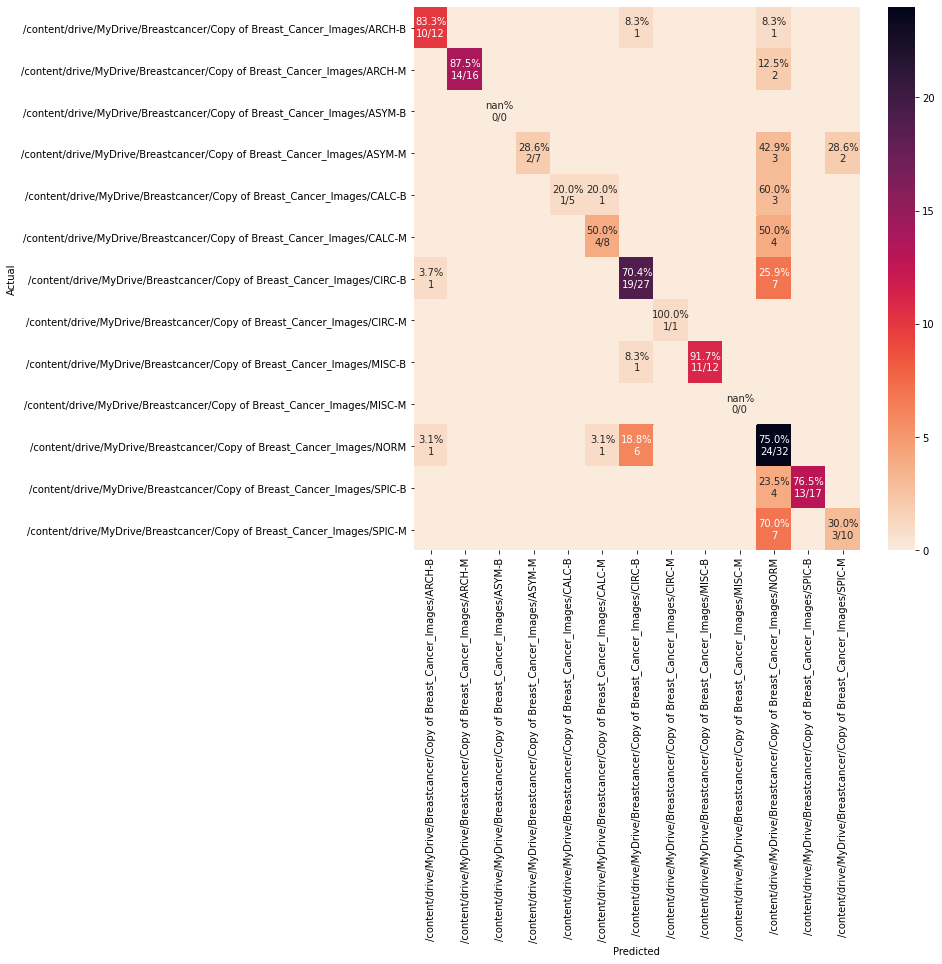

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.seterr(divide='ignore', invalid='ignore')

def cm_analysis(y_test, predicted, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_test:    true label of the data, with shape (nsamples,)
      predicted:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_test = [ymap[yi] for yi in y_test]
        predicted = [ymap[yi] for yi in y_test]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_test, predicted, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="rocket_r")
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test,predicted, clf.classes_, ymap=None, figsize=(10,10))



***Cross validation***

Testing the accuracy of the SVM model on the training dataset, that is splitting the dataset in k = 5 folds (subsets) and training k-1 sets than using the last set to test the model and evaluate it with the mean and standard deviation of the training and testing validation scores. The plot shows the training scores and cross-validation scores of an SVM for different values of the gamma parameters range (x-axis). At the low values of gamma from 0.00 - 0.02, both the training score and the validation score are underfitting with low values while the medium values of gamma from 0.02 - 0.05 tradeoff have higher values for both scores which shows the classifier performs well within the range of 0.76 - 0.82 (76% - 82%). At higher gamma values, the SVM classifier overfits with both scores at 0.98 (98%), overall the performance of the SVM model is at a good fit. Although the training score is better than the validation score. 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


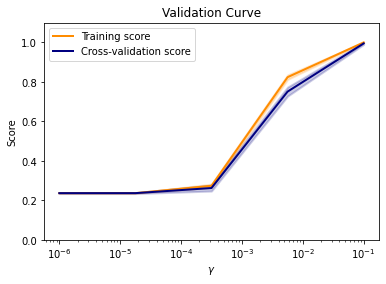

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets import load_digits
#from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), data_image_n, labels.ravel(), param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

####***ROC Curve***

The ROC curve is plotted with sklearn.metrics.plot_roc_curve, showing the performance of the SVM classifier at randomly different classification thresholds. 
ROC curves Y-axis (sensitivity) features the true positive rate and false positive rate on the X-axis. The top left curved corner of the plot is the “perfect” point of a true positive of one and false-positive of zero which mean that a larger area under the curve (AUC) is better which measures the overall accuracy from the two-dimensional area underneath the entire ROC curve. From the curve, the 0.97 AUC cutoff point shows a perfect accuracy as measured by the SVM algorithm.


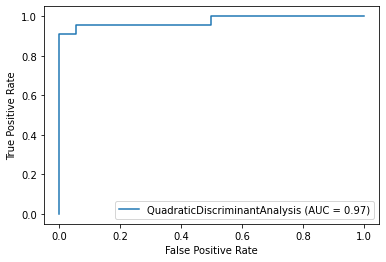

In [ ]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

***Comparison result of  the Support Vector Machine (SVM) Classifier and Convolutional tional Neural Network Accuracy***


As shown in these supervised machine learning experiments, the CNN algorithm with an overall 92% accuracy of the breast cancer images detection outperformed the SVM algorithm with an overall 77.5 % accuracy as related to the number of correct predictions. Although the SVM algorithm does not require a large dataset or argumentation of the images dataset and predicts based on the support vector extracted from the images, it still performed quite well in its prediction.